In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")
%matplotlib inline

In [116]:
# data frame set up
xlsx = pd.ExcelFile('FracStats_JobList_Summer2017.xlsx')
df_stats = xlsx.parse('FracStats')

relevant_cols = ['Well', 'System', 'Formation.1', 'Fluid Type', '100 Mesh, White [lbs]', 
                '30/50, White [lbs]', '40/70, White [lbs]', '20/40, White [lbs]', 
                'Total Proppant [lbs]', 'Screen Out']
df_stats = df_stats[relevant_cols]

print("You have {} stages at your disposal.".format(df_stats.shape[0]))
df_stats.head()

You have 1103 stages at your disposal.


,Well,System,Formation.1,Fluid Type,"100 Mesh, White [lbs]","30/50, White [lbs]","40/70, White [lbs]","20/40, White [lbs]",Total Proppant [lbs],Screen Out
0,P2,Sliding Sleeve,Nio C,Gel,7412.0,NaN,NaN,163021.0,NaN,No
1,P2,Sliding Sleeve,Nio C,Gel,6165.0,NaN,NaN,213117.0,NaN,No
2,P2,Sliding Sleeve,Nio C,Gel,5880.0,NaN,NaN,205057.0,NaN,No
3,P2,Sliding Sleeve,Nio C,Gel,6607.0,NaN,NaN,208468.0,NaN,No
4,P2,Sliding Sleeve,Nio C,Gel,6461.0,NaN,NaN,203365.0,NaN,No


You've been struggling on your last few stages. You haven't screened out, but you've had run-ins with high pressure and you don't want to push your luck. What are your options? Maybe you run some additional 100 Mesh to reduce tortusity -- it's expensive though, and you're already over-budget on this well. However, you can't afford to push your luck and potentially screen out with another pad to frac in just a couple days. You decide 100 Mesh is worth the added cost, but you want to use at little as possible with being certain you reap the benefits. You can obviously adjust on the fly depending on how pressure is looking, but you want to go in with a goal. You don't want to use that precious 100 Mesh frivously. So how much is enough?

Do you double your 100 Mesh, triple it? What's the call? We know no two wells are the same, but there's power in the data you have at your disposal. Let's use it.

The upcoming stage is in the Nio C. You're running Gel.

In [113]:
nioc_df = df_stats.loc[df_stats['Formation.1'] == 'Nio C']
print("You have {} historical stages in the Nio C.".format(nioc_df.shape[0]))
nioc_df.head()

You have 94 historical stages in the Nio C.


,Well,System,Formation.1,Fluid Type,"100 Mesh, White [lbs]","30/50, White [lbs]","40/70, White [lbs]","20/40, White [lbs]",Total Proppant [lbs],Screen Out
0,P2,Sliding Sleeve,Nio C,Gel,7412.0,NaN,NaN,163021.0,NaN,No
1,P2,Sliding Sleeve,Nio C,Gel,6165.0,NaN,NaN,213117.0,NaN,No
2,P2,Sliding Sleeve,Nio C,Gel,5880.0,NaN,NaN,205057.0,NaN,No
3,P2,Sliding Sleeve,Nio C,Gel,6607.0,NaN,NaN,208468.0,NaN,No
4,P2,Sliding Sleeve,Nio C,Gel,6461.0,NaN,NaN,203365.0,NaN,No


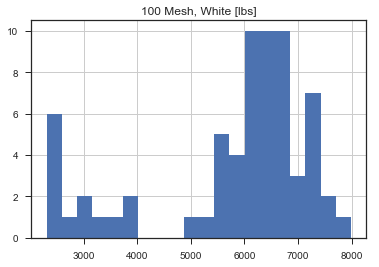

In [108]:
nioc_df.hist('100 Mesh, White [lbs]', bins=20);

In [94]:
nioc_df['Screen Out'].value_counts()

No     91
Cut     3
Name: Screen Out, dtype: int64

KeyError: "['Sliding Sleeve' 'Sliding Sleeve' 'Sliding Sleeve' 'Sliding Sleeve'\n 'Sliding Sleeve' 'Sliding Sleeve' 'Sliding Sleeve' 'Sliding Sleeve'\n 'Sliding Sleeve' 'Sliding Sleeve' 'Sliding Sleeve' 'Sliding Sleeve'\n 'Sliding Sleeve' 'Sliding Sleeve' 'Sliding Sleeve' 'Sliding Sleeve'\n 'Sliding Sleeve' 'Sliding Sleeve' 'Sliding Sleeve' 'Sliding Sleeve'\n 'Sliding Sleeve' 'Sliding Sleeve' 'Sliding Sleeve' 'Sliding Sleeve'\n 'Sliding Sleeve' 'Sliding Sleeve' 'Sliding Sleeve' 'Sliding Sleeve'\n 'Sliding Sleeve' 'Sliding Sleeve' 'Sliding Sleeve' 'Sliding Sleeve'\n 'Sliding Sleeve' 'Sliding Sleeve' 'Sliding Sleeve' 'Sliding Sleeve'\n 'Sliding Sleeve' 'Sliding Sleeve' 'Sliding Sleeve' 'Sliding Sleeve'\n 'Sliding Sleeve' 'Sliding Sleeve' 'Sliding Sleeve' 'Sliding Sleeve'\n 'Sliding Sleeve' 'Plug and Perf' 'Plug and Perf' 'Plug and Perf'\n 'Plug and Perf' 'Plug and Perf' 'Plug and Perf' 'Plug and Perf'\n 'Plug and Perf' 'Sliding Sleeve' 'Sliding Sleeve' 'Sliding Sleeve'\n 'Sliding Sleeve' 'Sliding Sleeve' 'Sliding Sleeve' 'Sliding Sleeve'\n 'Sliding Sleeve' 'Sliding Sleeve' 'Sliding Sleeve' 'Sliding Sleeve'\n 'Sliding Sleeve' 'Sliding Sleeve' 'Sliding Sleeve' 'Sliding Sleeve'\n 'Sliding Sleeve' 'Sliding Sleeve' 'Sliding Sleeve' 'Sliding Sleeve'\n 'Sliding Sleeve' 'Sliding Sleeve' 'Sliding Sleeve' 'Sliding Sleeve'\n 'Sliding Sleeve' 'Sliding Sleeve' 'Sliding Sleeve' 'Sliding Sleeve'\n 'Sliding Sleeve' 'Sliding Sleeve' 'Sliding Sleeve' 'Sliding Sleeve'\n 'Sliding Sleeve' 'Sliding Sleeve' 'Sliding Sleeve' 'Plug and Perf'\n 'Plug and Perf' 'Plug and Perf' 'Plug and Perf' 'Plug and Perf'\n 'Plug and Perf' 'Plug and Perf'] not in index"

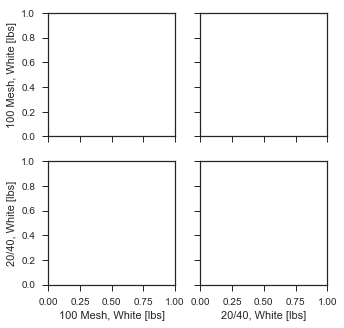

In [107]:
sns.pairplot(nioc_df[['100 Mesh, White [lbs]', '20/40, White [lbs]']], hue=nioc_df['System'], diag_kind="kde", plot_kws={"s": 40, "alpha": 0.6});

In [ ]:
df_stats.boxplot(column='100 Mesh, White [lbs]', by='Screen Out');

In [ ]:
# let's look at successful stages vs. unsuccessful stages
success_df = df_stats.loc[df_stats['Screen Out'] == 'No']
unsuccessful_df = df_stats.loc[df_stats['Screen Out'] != 'No']

In [ ]:
unsuccessful_df.shape

In [ ]:
success_df.shape

All that insight from X lines of code.

In [ ]:
df_stats["Formation.1"]